# Predict the Prevailing Wage using H-1B Visa Petitions 2011-2016

## About Dataset

H-1B visas are a category of employment-based, non-immigrant visas for temporary foreign workers in the United States. For a foreign national to apply for H1-B visa, a US employer must offer them a job and submit a petition for a H-1B visa to the US immigration department. This is also the most common visa status applied for and held by international students once they complete college or higher education and begin working in a full-time position.

This dataset contains five year's worth of H-1B petition data, with approximately 3 million records overall. The columns in the dataset include case status, employer name, worksite coordinates, job title, prevailing wage, occupation code, and year filed.

* `CASE_STATUS`: The `CASE_STATUS` field denotes the status of the application after LCA processing. Certified applications are filed with USCIS for H-1B approval. `CASE_STATUS: CERTIFIED` does not mean the applicant got his/her H-1B visa approved, it just means that he/she is eligible to file an H-1B.

* `EMPLOYER_NAME`: Name of the employer submitting labor condition application.
* `SOC_NAME`: Occupational name associated with the `SOC_CODE`. `SOC_CODE` is the occupational code associated with the job being requested for temporary labor condition, as classified by the Standard Occupational Classification (SOC) System.
* `JOB_TITLE`: Title of the job
* `FULL_TIME_POSITION`: `Y` = Full Time Position; `N` = Part Time Position
* `PREVAILING_WAGE`: Prevailing Wage for the job being requested for temporary labor condition. The wage is listed at annual scale in USD. The prevailing wage for a job position is defined as the average wage paid to similarly employed workers in the requested occupation in the area of intended employment. The prevailing wage is based on the employer’s minimum requirements for the position.
* `YEAR`: Year in which the H-1B visa petition was filed
* `WORKSITE`: The address of the employer worksite
* `lon`: Longitude of the employer worksite
* `lat`: Latitude of the employer worksite

### Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("h1b_kaggle.csv")
data

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003
...,...,...,...,...,...,...,...,...,...,...,...
3002453,3002454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NYC, NEW YORK",-74.005941,40.712784
3002454,3002455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002455,3002456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002456,3002457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OWINGS MILL, MARYLAND",-76.780253,39.419550


In [3]:
#  Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    #start_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    #end_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [4]:
data = reduce_mem_usage(data)
data.head()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.00000,2016.0,"ANN ARBOR, MICHIGAN",-83.7500,42.28125
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.00000,2016.0,"PLANO, TEXAS",-96.6875,33.03125
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.00000,2016.0,"JERSEY CITY, NEW JERSEY",-74.0625,40.71875
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.00000,2016.0,"DENVER, COLORADO",-105.0000,39.75000
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.40625,2016.0,"ST. LOUIS, MISSOURI",-90.1875,38.62500


In [5]:
data.describe()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/_core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/_core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initia

,Unnamed: 0,PREVAILING_WAGE,YEAR,lon,lat
count,3.002458e+06,3.002373e+06,3002445.0,2.895216e+06,2.895216e+06
mean,1.501230e+06,1.469985e+05,NaN,NaN,NaN
std,8.667351e+05,5.287610e+06,0.0,0.000000e+00,0.000000e+00
min,1.000000e+00,0.000000e+00,2011.0,-1.578750e+02,1.343750e+01
25%,7.506152e+05,5.437100e+04,2012.0,-1.119375e+02,3.415625e+01
50%,1.501230e+06,6.502100e+04,2014.0,-8.618750e+01,3.909375e+01
75%,2.251844e+06,8.143200e+04,2015.0,-7.550000e+01,4.087500e+01
max,3.002458e+06,6.997607e+09,2016.0,1.457500e+02,6.481250e+01


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int32  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float32
 7   YEAR                float16
 8   WORKSITE            object 
 9   lon                 float16
 10  lat                 float16
dtypes: float16(3), float32(1), int32(1), object(6)
memory usage: 177.5+ MB


In [7]:
data.shape

(3002458, 11)

## EDA

In [8]:
data.CASE_STATUS.value_counts()

CASE_STATUS
CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: count, dtype: int64

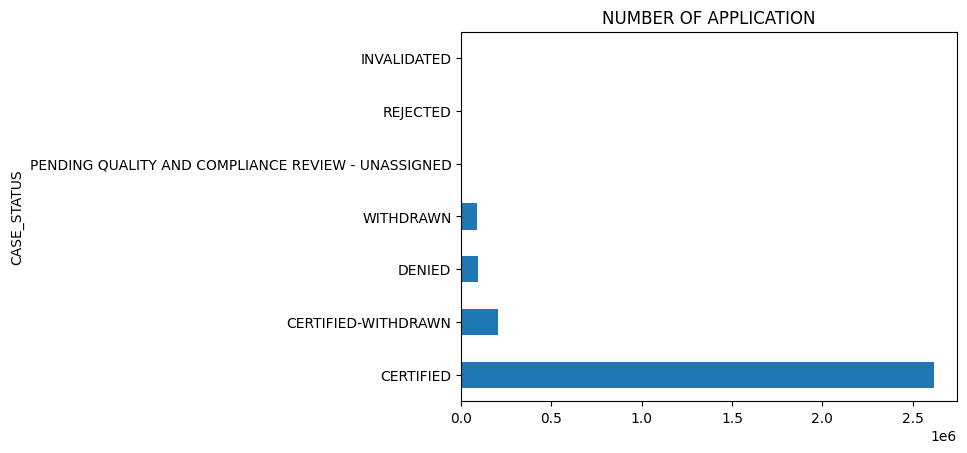

In [9]:
plt.figure()
data.CASE_STATUS.value_counts().plot(kind='barh')
data.sort_values('CASE_STATUS')
plt.title('NUMBER OF APPLICATION')
plt.show()

From the above graph we can say that the employees who have applied for the H-1B Visa were more than 2500000 whose application got certified and there were more than 200000 whose application's were certified and withdrawn and there were around 90000 whose application's were denied and there we around 80000 were withdrawn

<Axes: xlabel='YEAR'>

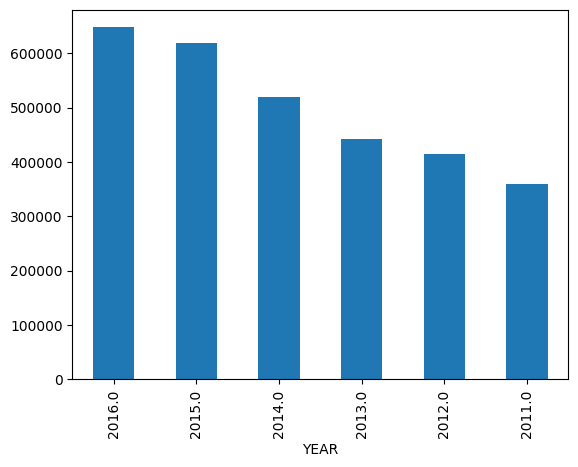

In [10]:
data.YEAR.value_counts().plot(kind='bar')

We can see that there is an exponential increase in the number of applications as the year passes

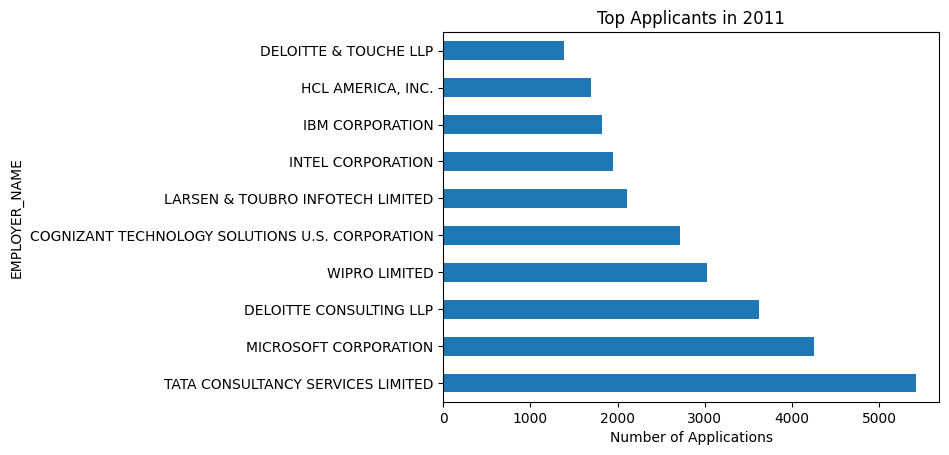

In [11]:
plt.figure()
top_applicants_2011 = data[data['YEAR'] == 2011]['EMPLOYER_NAME'].value_counts().head(10)
ax1 = top_applicants_2011.plot(kind='barh', title='Top Applicants in 2011')
ax1.set_xlabel('Number of Applications')
plt.show()

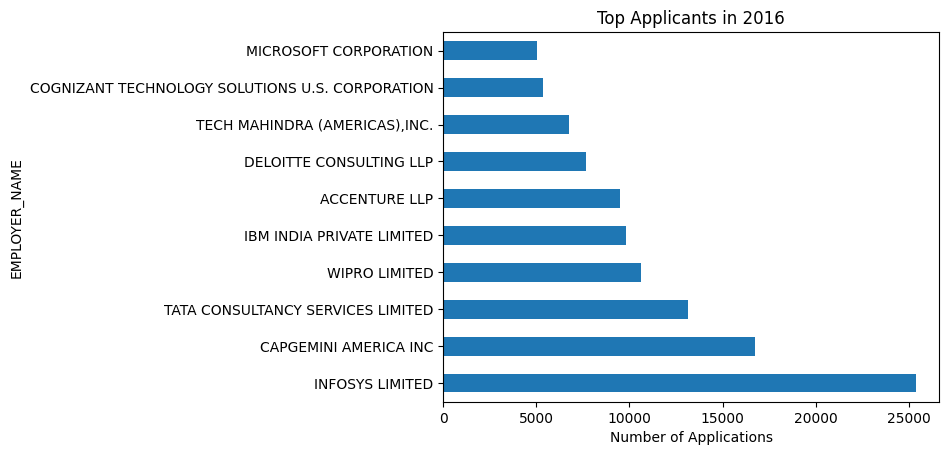

In [12]:
plt.figure()
top_applicants_2016 = data[data['YEAR'] == 2016]['EMPLOYER_NAME'].value_counts().head(10)
ax2 = top_applicants_2016.plot(kind='barh', title='Top Applicants in 2016')
ax2.set_xlabel('Number of Applications')
plt.show()

## Feature Engineering

### Removing outliers

In [13]:
data = data[data['PREVAILING_WAGE'] <= 500000]

top_emp = data.loc[data['YEAR']>=2015, 'EMPLOYER_NAME'].value_counts().nlargest(10).index.tolist()

by_emp_year = data[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][data['EMPLOYER_NAME'].isin(top_emp)]
by_emp_year = by_emp_year.groupby([data['EMPLOYER_NAME'],data['YEAR']])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


In [14]:
data.PREVAILING_WAGE.max()

np.float32(499417.0)

### Label encoding CASE_STATUS

In [15]:
data.isnull().sum()

Unnamed: 0                 0
CASE_STATUS                0
EMPLOYER_NAME             42
SOC_NAME               17698
JOB_TITLE                 26
FULL_TIME_POSITION         0
PREVAILING_WAGE            0
YEAR                       0
WORKSITE                   0
lon                   107089
lat                   107089
dtype: int64

In [16]:
data['SOC_NAME'] = data['SOC_NAME'].fillna(data['SOC_NAME'].mode()[0])

/var/folders/qb/8q46b91x0jvbcmpx5sk7229c0000gn/T/ipykernel_11955/245778018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SOC_NAME'] = data['SOC_NAME'].fillna(data['SOC_NAME'].mode()[0])


In [17]:
data.CASE_STATUS.value_counts()

CASE_STATUS
CERTIFIED                                             2615530
CERTIFIED-WITHDRAWN                                    202650
DENIED                                                  92149
WITHDRAWN                                               89565
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: count, dtype: int64

In [18]:
data = pd.get_dummies(data, columns=['CASE_STATUS'], drop_first=True)
data.head()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Unnamed: 0,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,CASE_STATUS_CERTIFIED-WITHDRAWN,CASE_STATUS_DENIED,CASE_STATUS_INVALIDATED,CASE_STATUS_PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED,CASE_STATUS_REJECTED,CASE_STATUS_WITHDRAWN
0,1,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.00000,2016.0,"ANN ARBOR, MICHIGAN",-83.7500,42.28125,True,False,False,False,False,False
1,2,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.00000,2016.0,"PLANO, TEXAS",-96.6875,33.03125,True,False,False,False,False,False
2,3,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.00000,2016.0,"JERSEY CITY, NEW JERSEY",-74.0625,40.71875,True,False,False,False,False,False
3,4,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.00000,2016.0,"DENVER, COLORADO",-105.0000,39.75000,True,False,False,False,False,False
4,5,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.40625,2016.0,"ST. LOUIS, MISSOURI",-90.1875,38.62500,False,False,False,False,False,True


In [19]:
data.FULL_TIME_POSITION.value_counts()

FULL_TIME_POSITION
Y    2573666
N     426246
Name: count, dtype: int64

In [20]:
data['FULL_TIME_POSITION'] = data['FULL_TIME_POSITION'].map({'Y': 1, 'N': 0})
data['FULL_TIME_POSITION'].value_counts()

FULL_TIME_POSITION
1    2573666
0     426246
Name: count, dtype: int64

In [21]:
data['SOC_NAME'].value_counts()

SOC_NAME
Computer Systems Analysts                          308564
Computer Programmers                               226272
SOFTWARE DEVELOPERS, APPLICATIONS                  221745
COMPUTER SYSTEMS ANALYSTS                          215315
Software Developers, Applications                  192692
                                                    ...  
ELEMENTARY SCHOOL TEACHERS, EXCEPT SPECIAL EDU          1
27-3031                                                 1
HEALTH PROFESSIONALS AND TECHNICIANS, ALL OTHER         1
15-1132                                                 1
Earth Drillers, Except Oil and Gas                      1
Name: count, Length: 2130, dtype: int64

In [22]:
# Normalize SOC_NAME and build SOC_NAME1 with case-insensitive matching
data['SOC_NAME'] = data['SOC_NAME'].fillna('').astype(str).str.lower().str.strip()

data['SOC_NAME1'] = 'other'
patterns = {
    'it': r'computer|software|agriculture|farm',
    'manager': r'chief|management',
    'mechanical': r'mechanical',
    'database': r'database',
    'scm': r'sales|market|distribution|logistics',
    'finance': r'financial',
    'pr': r'public|fundraising',
    'administrative': r'education|law',
    'audit': r'auditors|compliance',
    'hr': r'recruiters|human',
    'estate': r'construction|architectural|consturction',
    'medical': r'forensic|health',
    'education': r'teacher'
}

for label, pat in patterns.items():
    data.loc[data['SOC_NAME'].str.contains(pat, na=False), 'SOC_NAME1'] = label

# quick sanity check
print(data[['SOC_NAME','SOC_NAME1']].head(10))
print(data['SOC_NAME1'].value_counts().head(20))

                        SOC_NAME SOC_NAME1
0  biochemists and biophysicists     other
1               chief executives   manager
2               chief executives   manager
3               chief executives   manager
4               chief executives   manager
5               chief executives   manager
6               chief executives   manager
7               chief executives   manager
8               chief executives   manager
9               chief executives   manager
SOC_NAME1
it                1855363
other              620246
education           87653
scm                 82412
finance             74473
manager             71614
audit               57130
mechanical          46625
database            39023
medical             18594
administrative      15974
estate              13871
pr                   8755
hr                   8179
Name: count, dtype: int64


In [23]:
data.WORKSITE.value_counts()

WORKSITE
NEW YORK, NEW YORK            191539
HOUSTON, TEXAS                 83821
SAN FRANCISCO, CALIFORNIA      62750
ATLANTA, GEORGIA               52158
CHICAGO, ILLINOIS              51452
                               ...  
WILHOIT, ARIZONA                   1
SOUTH PLAINFIELD, MICHIGAN         1
WARSAW, GEORGIA                    1
SHELTON, MASSACHUSETTS             1
SECAUCUS, NORTH CAROLINA           1
Name: count, Length: 18600, dtype: int64

In [24]:
import re

us_states = {
    'Alabama':'AL','Alaska':'AK','Arizona':'AZ','Arkansas':'AR','California':'CA','Colorado':'CO',
    'Connecticut':'CT','Delaware':'DE','Florida':'FL','Georgia':'GA','Hawaii':'HI','Idaho':'ID',
    'Illinois':'IL','Indiana':'IN','Iowa':'IA','Kansas':'KS','Kentucky':'KY','Louisiana':'LA',
    'Maine':'ME','Maryland':'MD','Massachusetts':'MA','Michigan':'MI','Minnesota':'MN','Mississippi':'MS',
    'Missouri':'MO','Montana':'MT','Nebraska':'NE','Nevada':'NV','New Hampshire':'NH','New Jersey':'NJ',
    'New Mexico':'NM','New York':'NY','North Carolina':'NC','North Dakota':'ND','Ohio':'OH','Oklahoma':'OK',
    'Oregon':'OR','Pennsylvania':'PA','Rhode Island':'RI','South Carolina':'SC','South Dakota':'SD',
    'Tennessee':'TN','Texas':'TX','Utah':'UT','Vermont':'VT','Virginia':'VA','Washington':'WA',
    'West Virginia':'WV','Wisconsin':'WI','Wyoming':'WY','District of Columbia':'DC'
}

abbr_to_name = {v:k for k,v in us_states.items()}
abbr_set = set(abbr_to_name.keys())

def extract_state(worksite):
    if pd.isna(worksite):
        return np.nan
    s = str(worksite).strip()
    # take last comma-separated part (usually "STATE" or "STATE ZIP")
    parts = [p.strip() for p in s.split(',') if p.strip()]
    last = parts[-1] if parts else s
    # remove zip codes and extraneous digits
    last = re.sub(r'\d{4,}', '', last)      # remove long numeric tokens (zips)
    last = re.sub(r'\b\d+\b', '', last).strip()
    if not last:
        return np.nan
    # check for 2-letter abbreviation first
    tok = last.split()[0].upper()
    if tok in abbr_set:
        return abbr_to_name[tok]
    # check full state names (case-insensitive)
    for name in us_states.keys():
        if re.search(r'\b' + re.escape(name) + r'\b', last, flags=re.IGNORECASE):
            return name
    # fallback: try to find any abbreviation in the last part
    for abbr in abbr_set:
        if re.search(r'\b' + re.escape(abbr) + r'\b', last):
            return abbr_to_name[abbr]
    return np.nan

data['STATE'] = data['WORKSITE'].apply(extract_state)

print(data[['WORKSITE','STATE']].head(10))
print(data['STATE'].value_counts().head(20))

                  WORKSITE       STATE
0      ANN ARBOR, MICHIGAN    Michigan
1             PLANO, TEXAS       Texas
2  JERSEY CITY, NEW JERSEY  New Jersey
3         DENVER, COLORADO    Colorado
4      ST. LOUIS, MISSOURI    Missouri
5           MIAMI, FLORIDA     Florida
6           HOUSTON, TEXAS       Texas
7     SAN JOSE, CALIFORNIA  California
8           MEMPHIS, TEXAS       Texas
9         VIENNA, VIRGINIA    Virginia
STATE
California        559488
Texas             294230
New York          291121
New Jersey        213906
Illinois          160685
Massachusetts     116377
Pennsylvania      109857
Florida           105655
Georgia           103088
Washington        102732
Virginia           93017
Michigan           82897
North Carolina     79611
Ohio               76519
Maryland           56196
Connecticut        50221
Minnesota          48648
Arizona            42011
Missouri           34787
Wisconsin          32649
Name: count, dtype: int64


In [25]:
data.columns

Index(['Unnamed: 0', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat', 'CASE_STATUS_CERTIFIED-WITHDRAWN', 'CASE_STATUS_DENIED',
       'CASE_STATUS_INVALIDATED',
       'CASE_STATUS_PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED',
       'CASE_STATUS_REJECTED', 'CASE_STATUS_WITHDRAWN', 'SOC_NAME1', 'STATE'],
      dtype='object')

In [26]:
data = data.drop(['Unnamed: 0', 'EMPLOYER_NAME', 'SOC_NAME', 'WORKSITE', 'JOB_TITLE', 'lon', 'lat'], axis=1)
data.head()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,CASE_STATUS_CERTIFIED-WITHDRAWN,CASE_STATUS_DENIED,CASE_STATUS_INVALIDATED,CASE_STATUS_PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED,CASE_STATUS_REJECTED,CASE_STATUS_WITHDRAWN,SOC_NAME1,STATE
0,0,36067.00000,2016.0,True,False,False,False,False,False,other,Michigan
1,1,242674.00000,2016.0,True,False,False,False,False,False,manager,Texas
2,1,193066.00000,2016.0,True,False,False,False,False,False,manager,New Jersey
3,1,220314.00000,2016.0,True,False,False,False,False,False,manager,Colorado
4,1,157518.40625,2016.0,False,False,False,False,False,True,manager,Missouri


In [27]:
data['SOC_NAME1'].value_counts()

SOC_NAME1
it                1855363
other              620246
education           87653
scm                 82412
finance             74473
manager             71614
audit               57130
mechanical          46625
database            39023
medical             18594
administrative      15974
estate              13871
pr                   8755
hr                   8179
Name: count, dtype: int64

In [28]:
data = pd.get_dummies(data, columns=['SOC_NAME1'], drop_first=True)
data.head()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,CASE_STATUS_CERTIFIED-WITHDRAWN,CASE_STATUS_DENIED,CASE_STATUS_INVALIDATED,CASE_STATUS_PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED,CASE_STATUS_REJECTED,CASE_STATUS_WITHDRAWN,STATE,...,SOC_NAME1_estate,SOC_NAME1_finance,SOC_NAME1_hr,SOC_NAME1_it,SOC_NAME1_manager,SOC_NAME1_mechanical,SOC_NAME1_medical,SOC_NAME1_other,SOC_NAME1_pr,SOC_NAME1_scm
0,0,36067.00000,2016.0,True,False,False,False,False,False,Michigan,...,False,False,False,False,False,False,False,True,False,False
1,1,242674.00000,2016.0,True,False,False,False,False,False,Texas,...,False,False,False,False,True,False,False,False,False,False
2,1,193066.00000,2016.0,True,False,False,False,False,False,New Jersey,...,False,False,False,False,True,False,False,False,False,False
3,1,220314.00000,2016.0,True,False,False,False,False,False,Colorado,...,False,False,False,False,True,False,False,False,False,False
4,1,157518.40625,2016.0,False,False,False,False,False,True,Missouri,...,False,False,False,False,True,False,False,False,False,False


In [29]:
data['STATE'].value_counts()

STATE
California              559488
Texas                   294230
New York                291121
New Jersey              213906
Illinois                160685
Massachusetts           116377
Pennsylvania            109857
Florida                 105655
Georgia                 103088
Washington              102732
Virginia                 93017
Michigan                 82897
North Carolina           79611
Ohio                     76519
Maryland                 56196
Connecticut              50221
Minnesota                48648
Arizona                  42011
Missouri                 34787
Wisconsin                32649
Colorado                 32012
Indiana                  30505
Tennessee                27651
Oregon                   23770
District of Columbia     22682
Delaware                 18121
Iowa                     16735
Arkansas                 14752
Kansas                   13771
Utah                     13092
South Carolina           12922
Kentucky                 12691
Rh

In [30]:
data = pd.get_dummies(data, columns=['STATE'], drop_first=True)
data.head()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,CASE_STATUS_CERTIFIED-WITHDRAWN,CASE_STATUS_DENIED,CASE_STATUS_INVALIDATED,CASE_STATUS_PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED,CASE_STATUS_REJECTED,CASE_STATUS_WITHDRAWN,SOC_NAME1_audit,...,STATE_South Carolina,STATE_South Dakota,STATE_Tennessee,STATE_Texas,STATE_Utah,STATE_Vermont,STATE_Virginia,STATE_Washington,STATE_Wisconsin,STATE_Wyoming
0,0,36067.00000,2016.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,242674.00000,2016.0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1,193066.00000,2016.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,220314.00000,2016.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,157518.40625,2016.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


### Strongest Predictors:

* `FULL_TIME_POSITION` (correlation: 0.2) - Moderate positive correlation, suggesting full-time positions tend to have higher prevailing wages
* `YEAR` (correlation: 0.1) - Weak positive correlation, indicating wages may increase slightly over time

### Weak/Negligible Predictors:

* `CASE_STATUS` (correlation: -0.031) - Very weak negative correlation
* `SOC_NAME1` (correlation: -0.039) - Very weak negative correlation
* `STATE` (correlation: -0.086) - Weak negative correlation

In [35]:
X = data.drop(columns=['PREVAILING_WAGE'])
y = data['PREVAILING_WAGE']

In [43]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn. metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [37]:
# check boolean columns
bool_cols = X.select_dtypes(include='bool').columns
print(bool_cols)

# convert booleans to 0/1
X[bool_cols] = X[bool_cols].astype('int8')

# verify numeric dtypes
print(X.dtypes)

Index(['CASE_STATUS_CERTIFIED-WITHDRAWN', 'CASE_STATUS_DENIED',
       'CASE_STATUS_INVALIDATED',
       'CASE_STATUS_PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED',
       'CASE_STATUS_REJECTED', 'CASE_STATUS_WITHDRAWN', 'SOC_NAME1_audit',
       'SOC_NAME1_database', 'SOC_NAME1_education', 'SOC_NAME1_estate',
       'SOC_NAME1_finance', 'SOC_NAME1_hr', 'SOC_NAME1_it',
       'SOC_NAME1_manager', 'SOC_NAME1_mechanical', 'SOC_NAME1_medical',
       'SOC_NAME1_other', 'SOC_NAME1_pr', 'SOC_NAME1_scm', 'STATE_Alaska',
       'STATE_Arizona', 'STATE_Arkansas', 'STATE_California', 'STATE_Colorado',
       'STATE_Connecticut', 'STATE_Delaware', 'STATE_District of Columbia',
       'STATE_Florida', 'STATE_Georgia', 'STATE_Hawaii', 'STATE_Idaho',
       'STATE_Illinois', 'STATE_Indiana', 'STATE_Iowa', 'STATE_Kansas',
       'STATE_Kentucky', 'STATE_Louisiana', 'STATE_Maine', 'STATE_Maryland',
       'STATE_Massachusetts', 'STATE_Michigan', 'STATE_Minnesota',
       'STATE_Mississippi', 'S

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (SGD works better with scaled features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDRegressor(
        loss='squared_error',     # linear regression
        penalty='elasticnet',     # combines L1 & L2
        alpha=0.0001,             # regularization strength
        learning_rate='optimal',
        max_iter=2000,
        tol=1e-3,
        random_state=42
    ))
])

model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd',
                 SGDRegressor(learning_rate='optimal', max_iter=2000,
                              penalty='elasticnet', random_state=42))])

In [45]:
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 964329841354.7771
R2 Score: -1472.7319656433122


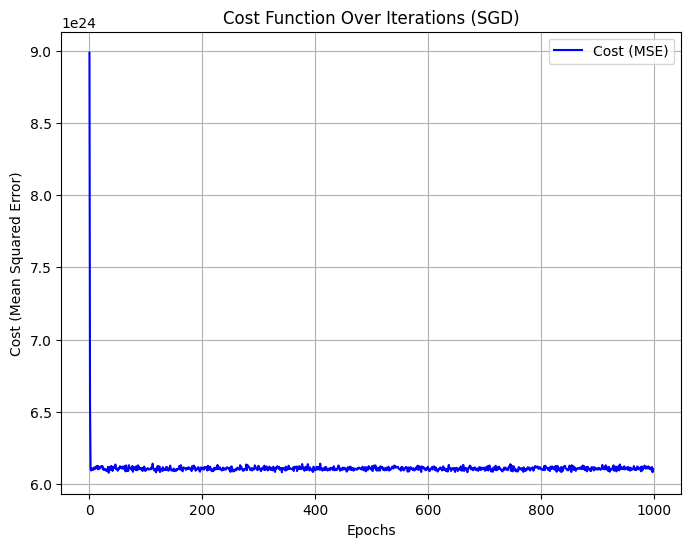

Final Mean Squared Error on Test Data: 4775102000913080314232832.0000
Final Coefficients (Weights): [ 1.04671215e+10 -5.99293500e+09 -7.63503400e+09  5.71605352e+09
  0.00000000e+00  1.70732652e+12  1.63172809e+12  3.45816944e+09
  3.38126461e+09  3.84992744e+09  6.14716630e+10  3.05654026e+10
 -8.88827751e+09 -7.62446614e+10 -1.81707367e+10  1.23660275e+09
 -3.39512503e+08 -4.31805024e+09  5.28760565e+10 -7.20794282e+10
 -9.39056044e+08  2.49932700e+11  5.17859756e+09 -7.05046983e+10
 -4.29200797e+09  8.83603974e+09  3.00096119e+09  2.36636628e+09
  4.24865079e+09  3.45388153e+09  5.31934043e+09  1.44001086e+11
 -1.34254057e+11  7.10894139e+09 -1.16922919e+09  8.45056077e+09
  7.44012092e+10  8.18131137e+10  9.29394930e+10 -1.33715692e+11
  7.57324426e+08  9.71650529e+09  4.78271241e+09  5.96731159e+09
  1.34950007e+11 -8.08946384e+08 -2.87736212e+11 -6.48451376e+10
  1.05598195e+11 -7.50100762e+10  3.95731177e+09  1.41488459e+11
 -1.26194467e+08  2.45838448e+09 -1.57109371e+11  5.888

In [48]:
sgd_reg = SGDRegressor(max_iter=1, tol=None, learning_rate='constant', eta0=0.01, random_state=42)

n_epochs = 1000
m = len(X_train_scaled)
cost_history = []

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_scaled, y_train)  # partial_fit updates the model incrementally
    y_train_predict = sgd_reg.predict(X_train_scaled)
    mse = mean_squared_error(y_train, y_train_predict)
    cost_history.append(mse)

plt.figure(figsize=(8, 6))
plt.plot(range(n_epochs), cost_history, 'b-', label='Cost (MSE)')
plt.title('Cost Function Over Iterations (SGD)')
plt.xlabel('Epochs')
plt.ylabel('Cost (Mean Squared Error)')
plt.grid(True)
plt.legend()
plt.show()

y_pred = sgd_reg.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_pred)
print(f"Final Mean Squared Error on Test Data: {mse_test:.4f}")
print("Final Coefficients (Weights):", sgd_reg.coef_)
print("Final Intercept (Bias):", sgd_reg.intercept_)